In [10]:

library(data.table)
library(ggplot2)
library(reshape2)

In [17]:
#dir='/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/'
dir='/wynton/group/ye/ggordon/lupus/analyses/atac_enrichemnt/'
out='atac.enrichment.pdf'

#cts=c('Th', 'Tc', 'B', 'cM', 'ncM', 'NK', 'MK', 'cDC', 'PBMC')
#cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'progen', 'prolif', 'tcyto', 'tem', 'tnaive', 'treg')
cts=c('pbmc', 'b', 'cdc', 'cm', 'ncm', 'nk', 'pdc', 'tcyto', 'tem', 'tnaive')

all.df=NULL
for(c in cts){
    res=fread(file=paste(dir, c, '.atac.MW.enrichment.txt', sep=''))
    #res=fread(file=paste(dir, c, '.atac.intersectdelta.MW.enrichment.txt', sep=''))
    all.df=rbind(all.df, data.frame(res, ct=c))
    
}



all.df$pval_sig='.'
all.df$pval_sig[all.df$pval < 0.01]='*'
all.df$pval_sig[all.df$pval < 0.001]='**'
all.df$pval_sig[all.df$pval < 0.0001]='***'


all.df.use=all.df[all.df$ct!='MK', ]
all.df.use$pair=paste(all.df.use$group, all.df.use$ct)
print(head(all.df.use))

all.df.use$logp=-log10(all.df.use$pval)

#mat=dcast(all.df.use, group ~ ct, value.var = 'OR')

mat=dcast(all.df.use, group ~ ct, value.var = 'logp')
rownames(mat)=mat$group

# #normalize by row
mat=mat[, -1]
col_names=colnames(mat)
print(mat)
mat <- t(apply(mat, 1, function(x){scale(x)}))
colnames(mat)=col_names
df.use=melt(mat)

df.use$pair=paste(df.use$Var1, df.use$Var2)
df.use$pval_sig=all.df.use$pval_sig[match(df.use$pair, all.df.use$pair)]


print(head(df.use))

# print(unique(df.use$Var1))
# print(unique(df.use$Var2))

# #  [1] B_resting          B_stimulated       B&T_stimulated     EPI_resting       
# #  [5] myeloid_resting    nk_resting         open               progenitor_resting
# #  [9] T_resting          T_stimulated       thymo_resting    


order_var1=c('B_resting', 'B_stimulated', 'B&T_stimulated', 'T_resting', 'T_stimulated',  'nk_resting', 'EPI_resting', 'progenitor_resting', 'thymo_resting', 'myeloid_resting', 'open')
#order_var2=c('B', 'Th', 'Tc', 'NK', 'cM', 'ncM', 'cDC', 'PBMC', 'ct.combined')
order_var2=c('b', 'tcyto', 'tem', 'tnaive', 'nk', 'cm', 'ncm', 'cdc', 'pdc','pbmc', 'ct.combined')
df.use$Var1=factor(df.use$Var1, levels=order_var1)
df.use$Var2=factor(df.use$Var2, levels=order_var2)

df.use=df.use[-which(df.use$Var1 %in% c('EPI_resting', 'progenitor_resting')), ]

        W       pval           group   ct pval_sig                 pair
1 7169413 0.06384235       B_resting pbmc        .       B_resting pbmc
2 2120669 0.26978050    B_stimulated pbmc        .    B_stimulated pbmc
3 3446034 0.56116655  B&T_stimulated pbmc        .  B&T_stimulated pbmc
4 9385697 0.99976891     EPI_resting pbmc        .     EPI_resting pbmc
5 8145312 0.96306679 myeloid_resting pbmc        . myeloid_resting pbmc
6 6440834 0.15233380      nk_resting pbmc        .      nk_resting pbmc
                           pbmc            b         cdc           cm
B_resting          1.194891e+00 1.985826e-03 0.198332239 7.751843e-01
B_stimulated       5.689894e-01 3.069520e-01 0.234229796 3.943375e-01
B&T_stimulated     2.509082e-01 4.761146e-04 0.211955425 2.001417e+00
EPI_resting        1.003737e-04 4.908274e-04 0.035629977 2.539295e-02
myeloid_resting    1.634359e-02 1.630410e-02 1.031247240 5.069594e-01
nk_resting         8.172037e-01 9.431072e-02 0.682892068 1.160797e-01
open  

In [15]:
options(repr.plot.width=8, repr.plot.height=5)


pdf('figures/atac.MW.enrichment.heatmap.pdf', useDingbats = F, width =8 , height=5)
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient(low = "white", high = "steelblue") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)
print(plt)
dev.off()

ERROR: Error in pdf("figures/atac.MW.enrichment.heatmap.pdf", useDingbats = F, : cannot open file 'figures/atac.MW.enrichment.heatmap.pdf'


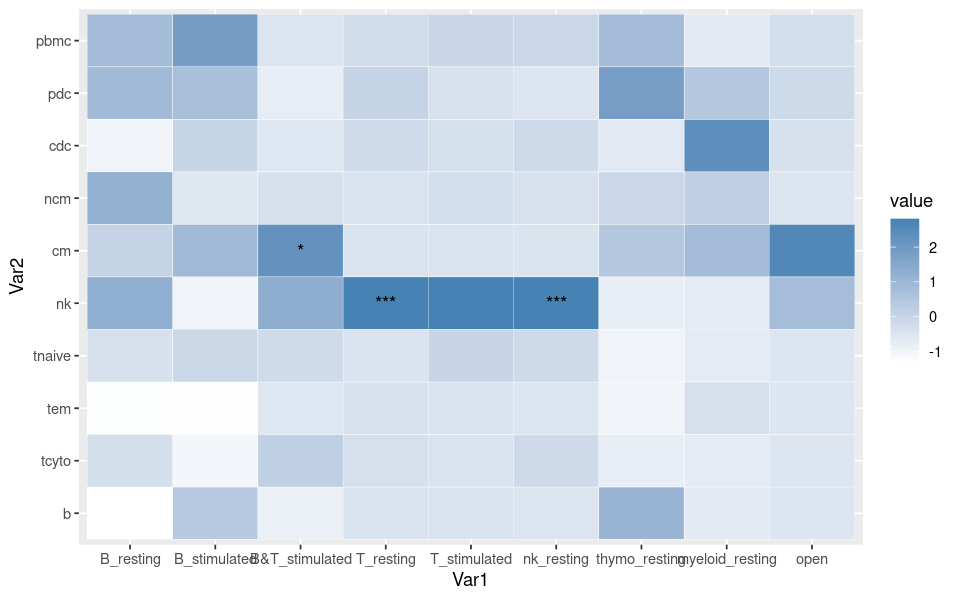

In [18]:
plt=ggplot(df.use, aes(Var1, Var2)) + geom_tile(aes(fill = value), colour = "white") + scale_fill_gradient(low = "white", high = "steelblue") 
plt=plt+ geom_text(data= subset(df.use, pval_sig != '.'), aes(Var1, Var2, label = pval_sig), color = "black", size = 4)
print(plt)

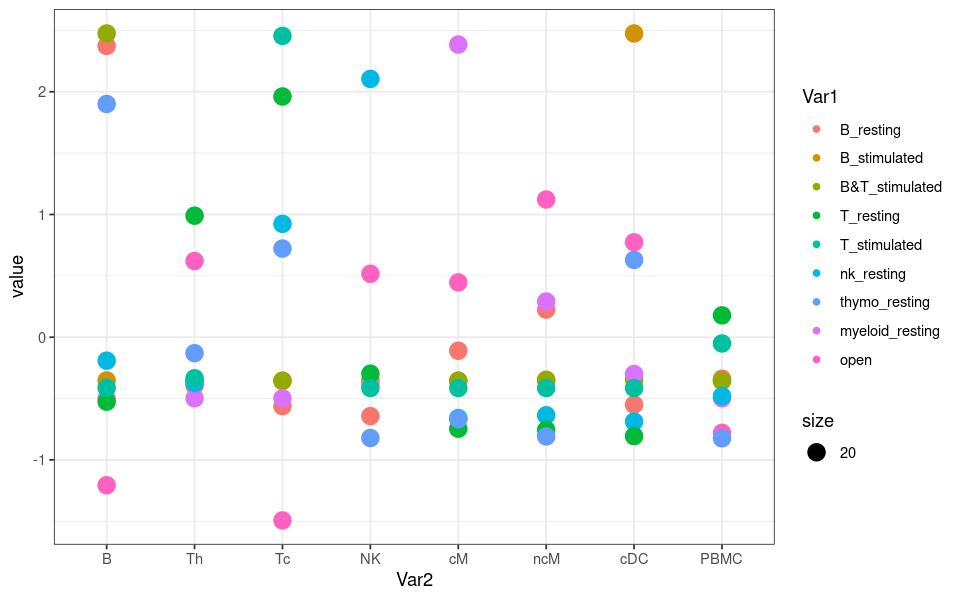

In [4]:

ggplot(df.use,aes(x=Var2, y=value, color=Var1, size=20)) + geom_point() + theme_bw()